In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from replay_analysis import ExperienceRelay
from replay_analysis import filter_frames
from replay_analysis import get_debug_values
from replay_analysis import analysis_case
from replay_analysis import PerspectiveRender
from replay_analysis import GradientAnalysis
from replay_analysis import highlight_position
from replay_analysis import pitch_roll_deviation

from experiment_path import experiment
from rover_spec import GROUND_TRUTH_MAP

In [2]:
gradient_analyzer = GradientAnalysis(GROUND_TRUTH_MAP)
path = experiment('perception_optimize/pitch_calibrated_perspective')
replay = ExperienceRelay(path=path)
render = PerspectiveRender(scale=1, resolution=60)

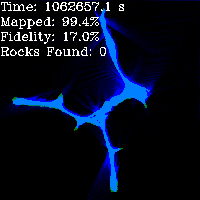

In [3]:
# singular drop = 0
replay.replay()
replay.frames[-1].map

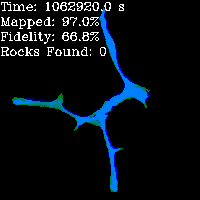

In [3]:
# singular drop = 3
replay.reset_config({'PERCEPTION': {'SingularDrop': '3'}})
replay.replay()
replay.frames[-1].map

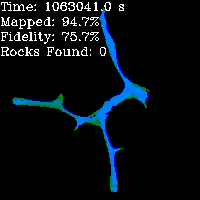

In [4]:
# singular drop = 5
replay.reset_config({'PERCEPTION': {'SingularDrop': '5'}})
replay.replay()
replay.frames[-1].map

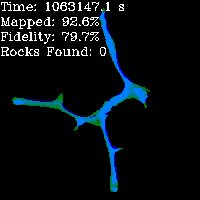

In [5]:
# singular drop = 7
replay.reset_config({'PERCEPTION': {'SingularDrop': '7'}})
replay.replay()
replay.frames[-1].map

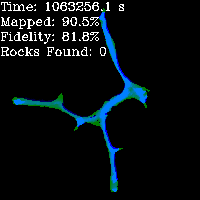

In [6]:
# singular drop = 9
replay.reset_config({'PERCEPTION': {'SingularDrop': '9'}})
replay.replay()
replay.frames[-1].map

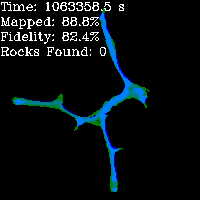

In [7]:
# singular drop = 11
replay.reset_config({'PERCEPTION': {'SingularDrop': '11'}})
replay.replay()
replay.frames[-1].map

comparing with parameter tuning of clibrated perspective perception (the baseline), in low singularity drop (< 7) situations, pitch calibrated algorithm achieves higher fidelity with similar map coverage.

In the case when sigularity drop is high, only meters of measurement in front of the camera is used to construct map(myopic case). In this case the baseline algorithm tends to overestimate the horizontal dimension;

This error will affect fedility little (because the measurement is near camera) while increase the coverage

this explains in the high singular drop cases the pitch calibrated algorithm achieve higher fedility but lower coverage